In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 34.2MB/s]


In [ ]:
!unzip '/content/mobile-price-classification.zip' -d '/content/'

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
import statsmodels.api as sm
from sklearn.metrics import auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('./train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

In [ ]:
for i in range(len(y)):
  if y[i] > 1:
    y[i] = 1
  else:
      y[i] = 0
y  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [ ]:
sc = StandardScaler()
x[x.columns] = sc.fit_transform(x[x.columns])
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


## 1.Forward Selection

In [ ]:
from sklearn.metrics import roc_auc_score
def forward_selection(x, y):
  features = []
  scores = []
  left_features = x.columns
  for i in range(len(x.columns)):
    max_auc_score = 0
    best_feature = ""
    for feature in left_features:
      new_x = x[features + [feature]]
      x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=21)
      logisticReg = LogisticRegression()
      logisticReg.fit(x_train, y_train)
      y_pred = logisticReg.predict(x_test)
      cur_auc_score = roc_auc_score(y_test, y_pred)

      if cur_auc_score > max_auc_score :
        max_auc_score = cur_auc_score
        best_feature = feature
    left_features = left_features.drop(best_feature)
    features.append(best_feature)
    scores.append(max_auc_score)
    
  best_index = scores.index(max(scores))

  result = {}
  result['scores'] = scores
  result['features'] = features
  result['best_features'] = features[:best_index+1]
  return result

In [ ]:
forward_sel = forward_selection(x, y)
best_features = forward_sel['best_features']
best_features

['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt']

## 2.Train 

In [ ]:
x = x[best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

In [ ]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)
y_pred = logisticReg.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       309
           1       1.00      0.98      0.99       291

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



## 3.PCA

In [ ]:
df = pd.read_csv('./train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

In [ ]:
for i in range(len(y)):
  if y[i] > 1:
    y[i] = 1
  else:
      y[i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sc = StandardScaler()
x[x.columns] = sc.fit_transform(x[x.columns])
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [ ]:
pca = PCA(n_components=5)
pca.fit_transform(x)
pca.n_components_

5

## 4. Train

In [ ]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.3, random_state=43)

In [ ]:
logisticReg.fit(x_train_new, y_train_new)
y_pred_new = logisticReg.predict(x_test_new)

In [ ]:
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       309
           1       0.99      0.98      0.98       291

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.98      0.98       600



## 6.Feature Engineering

### a) Binning

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
import numpy as np


In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

min_value = x['battery_power'].min()
max_value = x['battery_power'].max()

bins = np.linspace(min_value,max_value,4)
print("bins: " ,bins)

labels = ['low', 'medium', 'high']

x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)
x


bins:  [ 501. 1000. 1499. 1998.]


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,low,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,high,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,high,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,high,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


(array([697., 641., 662.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

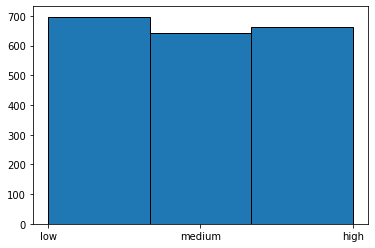

In [ ]:
plt.hist(x['battery_power'], bins=3, edgecolor='black', linewidth=1)


bins:  [ 501.   800.4 1099.8 1399.2 1698.6 1998. ]


(array([409., 422., 400., 394., 375.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

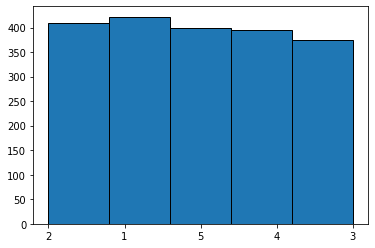

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

min_value = x['battery_power'].min()
max_value = x['battery_power'].max()

bins = np.linspace(min_value,max_value,6)
print("bins: " ,bins)

labels = ['1', '2', '3', '4', '5']

x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)
plt.hist(x['battery_power'], bins=5, edgecolor='black', linewidth=1)


bins:  [500.0, 1000.0, 1500.0, 2000.0]


(array([697., 641., 662.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

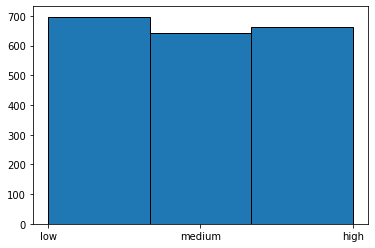

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

bins=[500., 1000., 1500., 2000.]
print("bins: " ,bins)
labels = ['low', 'medium', 'high']

x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)

plt.hist(x['battery_power'], bins=3, edgecolor='black', linewidth=1)


In [ ]:
binned_x = x

### b) One hot encoding

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

min_value = x['battery_power'].min()
max_value = x['battery_power'].max()

bins = np.linspace(min_value,max_value,4)

labels = ['low', 'medium', 'high']

x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)

d = pd.get_dummies(x['battery_power'], prefix='bat_po')
x = x.join(d)
x.drop(['battery_power'], inplace=True, axis=1)

x

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,bat_po_low,bat_po_medium,bat_po_high
0,0,2.2,0,1,0,7,0.6,188,2,2,...,2549,9,7,19,0,0,1,1,0,0
1,1,0.5,1,0,1,53,0.7,136,3,6,...,2631,17,3,7,1,1,0,0,1,0
2,1,0.5,1,2,1,41,0.9,145,5,6,...,2603,11,2,9,1,1,0,1,0,0
3,1,2.5,0,0,0,10,0.8,131,6,9,...,2769,16,8,11,1,0,0,1,0,0
4,1,1.2,0,13,1,44,0.6,141,2,14,...,1411,8,2,15,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,0.8,106,6,14,...,668,13,4,19,1,1,0,1,0,0
1996,1,2.6,1,0,0,39,0.2,187,4,3,...,2032,11,10,16,1,1,1,0,0,1
1997,0,0.9,1,1,1,36,0.7,108,8,3,...,3057,9,1,5,1,1,0,0,0,1
1998,0,0.9,0,4,1,46,0.1,145,5,5,...,869,18,10,19,1,1,1,0,0,1


In [ ]:
encoded_x = x

### c) Transformation

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

(array([223., 199., 210., 199., 190., 185., 193., 201., 197., 203.]),
 array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
        1698.6, 1848.3, 1998. ]),
 <a list of 10 Patch objects>)

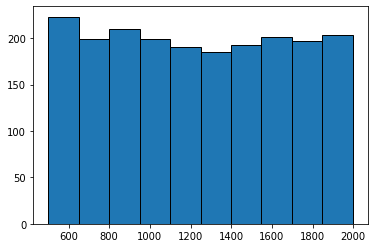

In [ ]:
plt.hist(x['battery_power'] ,edgecolor='black', linewidth=1)


(array([551., 116., 168., 138., 203., 127., 202., 136., 184., 175.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <a list of 10 Patch objects>)

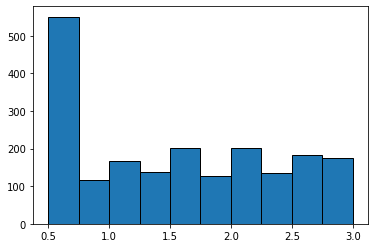

In [ ]:
plt.hist(x['clock_speed'] ,edgecolor='black', linewidth=1)

(array([719., 359., 272., 212., 155., 113.,  85.,  43.,  30.,  12.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

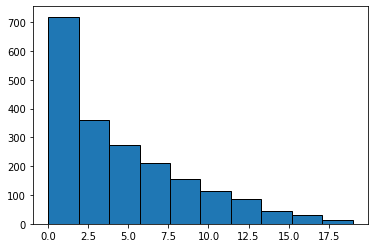

In [ ]:
plt.hist(x['fc'] ,edgecolor='black', linewidth=1)

In [ ]:
x['fc'] = np.log(x['fc']+1)

(array([474.,   0., 245., 189., 170., 272., 212., 155., 198.,  85.]),
 array([0.        , 0.29957323, 0.59914645, 0.89871968, 1.19829291,
        1.49786614, 1.79743936, 2.09701259, 2.39658582, 2.69615905,
        2.99573227]),
 <a list of 10 Patch objects>)

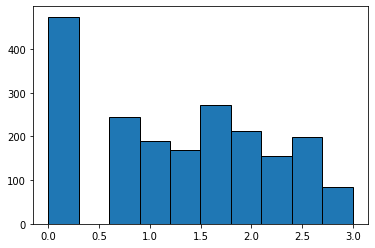

In [ ]:
plt.hist(x['fc'] ,edgecolor='black', linewidth=1)

(array([551., 116., 168., 138., 203., 127., 202., 136., 184., 175.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <a list of 10 Patch objects>)

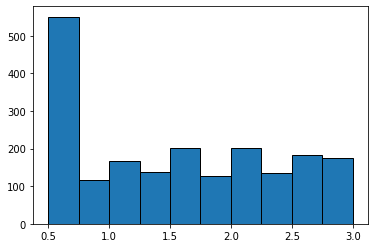

In [ ]:
plt.hist(x['clock_speed'] ,edgecolor='black', linewidth=1)

(array([237., 217., 197., 179., 196., 205., 203., 183., 193., 190.]),
 array([ 2. ,  8.2, 14.4, 20.6, 26.8, 33. , 39.2, 45.4, 51.6, 57.8, 64. ]),
 <a list of 10 Patch objects>)

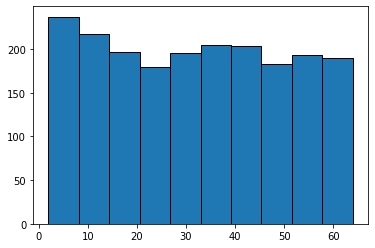

In [ ]:
plt.hist(x['int_memory'] ,edgecolor='black', linewidth=1)

(array([320., 213., 199., 168., 205., 186., 200., 208., 195., 106.]),
 array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 <a list of 10 Patch objects>)

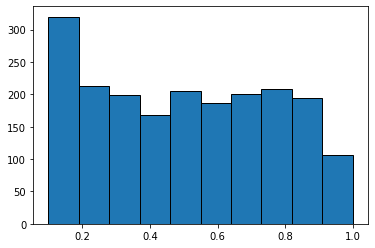

In [ ]:
plt.hist(x['m_dep'] ,edgecolor='black', linewidth=1)

(array([209., 192., 214., 171., 201., 196., 208., 183., 203., 223.]),
 array([ 80.,  92., 104., 116., 128., 140., 152., 164., 176., 188., 200.]),
 <a list of 10 Patch objects>)

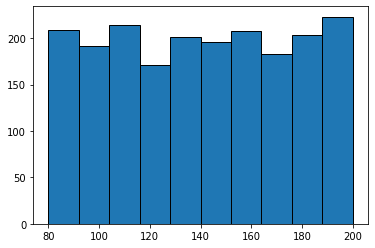

In [ ]:
plt.hist(x['mobile_wt'] ,edgecolor='black', linewidth=1)

(array([242., 247., 246.,   0., 274., 246.,   0., 230., 259., 256.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

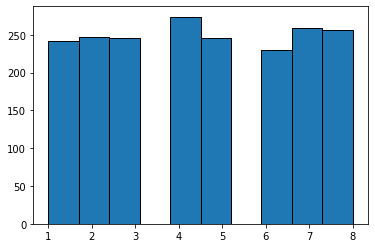

In [ ]:
plt.hist(x['n_cores'] ,edgecolor='black', linewidth=1)

(array([205., 192., 154., 214., 201., 201., 175., 196., 187., 275.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

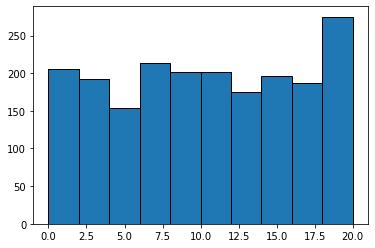

In [ ]:
plt.hist(x['pc'] ,edgecolor='black', linewidth=1)

(array([181., 210., 202., 204., 207., 205., 195., 187., 196., 213.]),
 array([ 500. ,  649.8,  799.6,  949.4, 1099.2, 1249. , 1398.8, 1548.6,
        1698.4, 1848.2, 1998. ]),
 <a list of 10 Patch objects>)

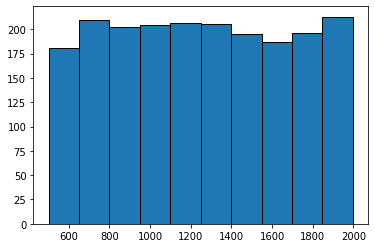

In [ ]:
plt.hist(x['px_width'] ,edgecolor='black', linewidth=1)

(array([343., 358., 329., 293., 214., 176., 135.,  71.,  55.,  26.]),
 array([   0.,  196.,  392.,  588.,  784.,  980., 1176., 1372., 1568.,
        1764., 1960.]),
 <a list of 10 Patch objects>)

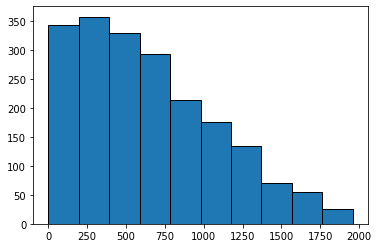

In [ ]:
plt.hist(x['px_height'] ,edgecolor='black', linewidth=1)

In [ ]:
x['px_height'] = np.log(x['px_height']+1)

(array([  3.,   3.,   8.,  13.,  31.,  83., 206., 429., 690., 534.]),
 array([0.        , 0.75812098, 1.51624197, 2.27436295, 3.03248393,
        3.79060491, 4.5487259 , 5.30684688, 6.06496786, 6.82308884,
        7.58120983]),
 <a list of 10 Patch objects>)

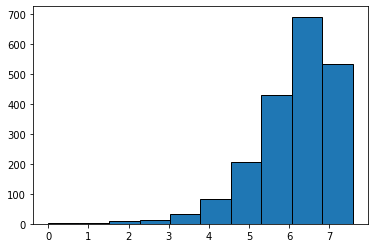

In [ ]:
plt.hist(x['px_height'] ,edgecolor='black', linewidth=1)

(array([193., 216., 235., 204., 105., 202., 201., 231., 198., 215.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <a list of 10 Patch objects>)

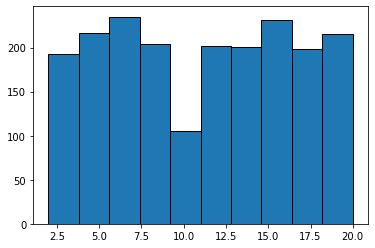

In [ ]:
plt.hist(x['talk_time'] ,edgecolor='black', linewidth=1)

(array([390., 355., 343., 262., 125., 204., 152.,  82.,  60.,  27.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

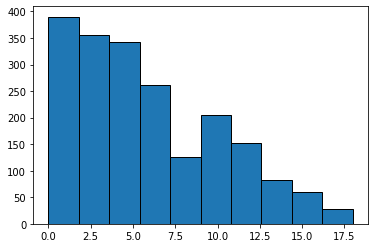

In [ ]:
plt.hist(x['sc_w'] ,edgecolor='black', linewidth=1)

In [ ]:
x['sc_w'] = np.log(x['sc_w']+1)

(array([180.,   0., 210., 156., 199., 182., 291., 354., 308., 120.]),
 array([0.        , 0.2944439 , 0.5888878 , 0.88333169, 1.17777559,
        1.47221949, 1.76666339, 2.06110729, 2.35555118, 2.64999508,
        2.94443898]),
 <a list of 10 Patch objects>)

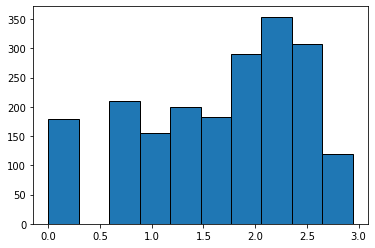

In [ ]:
plt.hist(x['sc_w'] ,edgecolor='black', linewidth=1)

(array([211., 151., 241., 125., 126., 288., 143., 278., 193., 244.]),
 array([ 5. ,  6.4,  7.8,  9.2, 10.6, 12. , 13.4, 14.8, 16.2, 17.6, 19. ]),
 <a list of 10 Patch objects>)

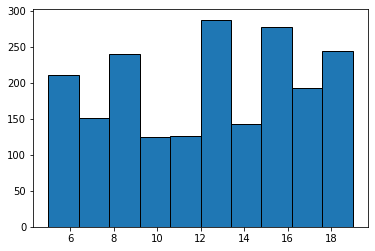

In [ ]:
plt.hist(x['sc_h'] ,edgecolor='black', linewidth=1)

(array([215., 183., 206., 200., 189., 219., 202., 181., 197., 208.]),
 array([ 256. ,  630.2, 1004.4, 1378.6, 1752.8, 2127. , 2501.2, 2875.4,
        3249.6, 3623.8, 3998. ]),
 <a list of 10 Patch objects>)

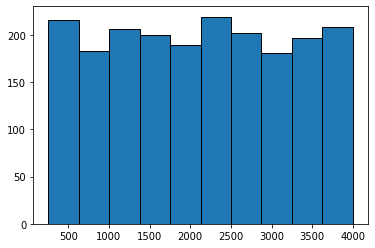

In [ ]:
plt.hist(x['ram'] ,edgecolor='black', linewidth=1)

In [ ]:
transformed_x = x

### d) New feature

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x['mobile_volume'] = x['sc_w'] * x['sc_h'] * x['m_dep']
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,mobile_volume
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,37.8
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,35.7
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,19.8
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,102.4
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,41.6
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,22.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,6.3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,18.0


In [ ]:
new_x = x

## 7.SVM

a) SVM with binned and encoded battery power

In [ ]:
from sklearn.svm import SVC

svc = SVC()
x_train, x_test, y_train, y_test = train_test_split(encoded_x, y, test_size=0.3, random_state=43)
svc.fit(x_train, y_train)
score = svc.score(x_test, y_test)
score

0.7883333333333333

b) SVM with new feature

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.3, random_state=43)
svc.fit(x_train, y_train)
score = svc.score(x_test, y_test)
score

0.9416666666666667

c) SVM with transformed data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.3, random_state=43)
svc.fit(x_train, y_train)
score = svc.score(x_test, y_test)
score

0.9016666666666666

d) SVM with binned and encoded battery power and new feature

In [ ]:
joined_x = new_x.drop(['battery_power'], axis=1)
joined_x['bat_po_low'] = encoded_x['bat_po_low']
joined_x['bat_po_medium'] = encoded_x['bat_po_medium']
joined_x['bat_po_high'] = encoded_x['bat_po_high']
joined_x['sc_w'] = transformed_x['sc_w']
joined_x['fc'] = transformed_x['fc']
joined_x['px_height'] = transformed_x['px_height']


In [ ]:
svc = SVC()
x_train, x_test, y_train, y_test = train_test_split(joined_x, y, test_size=0.3, random_state=43)
svc.fit(x_train, y_train)
score = svc.score(x_test, y_test)
score

0.77

## 8.Bootstrapping VS Cross

### What is bootstrapping? 
### What is the difference between bootstrapping and cross-validation?


Both cross validation and bootstrapping are resampling methods.



*   Bootstrap resamples with replacement (and usually produces new "surrogate" datasets with the same number of cases as the original data set). Due to the drawing with replacement, a bootstrapped data set may contain multiple instances of the same original cases, and may completely omit other original cases.

*   Cross validation resamples without replacement and thus produces surrogate data sets that are smaller than the original. These data sets are produced in a systematic way so that after a pre-specified number k of surrogate data sets, each of the n original cases has been left out exactly once. This is called k-fold cross validation or leave-x-out cross validation with x=n/k, e.g. leave-one-out cross validation omits 1 case for each surrogate set, i.e. k=n.

*   In summary, Cross validation splits the available dataset to create multiple datasets, and Bootstrapping method uses the original dataset to create multiple datasets after resampling with replacement. 



### When should we use bootstrapping?


Bootstrapping it is not as strong as Cross validation when it is used for model validation. Bootstrapping is more about building ensemble models or just estimating parameters.


## 9. 5x2 Cross Validation

5x2 cross validation refers to a 5 repetition of a 2-fold. First step is to split data into half, then repeat it 4 more times. The 5x2cv was popularised by the paper Approximate statistical tests for comparing supervised classification learning algorithms by Dietterich as a way of obtaining not only a good estimate of the generalisation error but also a good estimate of the variance of that error (in order to perform statistical tests)

## 10. Elbow Method

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

In order to decrease the estimation error, we need to decrease both the bias and variance. We have to select a model (in our example the degree of the polynomial) that trades-off the bias and variance in such a way that error is minimized. The test error can be high both in the case of over-fitting and under-fitting. Hence, we need an optimal balance of both bias and variance so that our model neither overfits nor under fits our data.

**For clean and large enough dataset:**

* The greater the model complexity the lower the estimation error, the better the approximation.
* The greater the model complexity the lower the bias
* The greater the model complexity the lower the variance

**For noisy dataset:**

* Greater model complexity doesn’t mean lower estimation error
* The greater the model complexity the lower the bias
* The greater the model complexity the higher the variance

Since the dataset in the real world is almost always noisy and limited, hence we need to find the optimum complexity of the underlying model that gives us the minimum error on the dataset. Higher complexity doesn’t guarantee the best fit.